<a href="https://colab.research.google.com/github/Edwseth/Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [57]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [70]:
nombres_tiendas = {
    url: "Tienda 1",
    url2: "Tienda 2",
    url3: "Tienda 3",
    url4: "Tienda 4"
}


In [58]:
import unicodedata

def normalizar_columnas(df):
    df.columns = [unicodedata.normalize('NFKD', col.strip().lower()).encode('ascii', errors='ignore').decode('utf-8') for col in df.columns]
    return df

# Normalizar columnas de todas las tiendas
tienda = normalizar_columnas(tienda)
tienda2 = normalizar_columnas(tienda2)
tienda3 = normalizar_columnas(tienda3)
tienda4 = normalizar_columnas(tienda4)



#1. Análisis de facturación



In [59]:
def analisis_facturacion():
  ingresos = {
      url : tienda["precio"].sum(),
      url2 : tienda2["precio"].sum(),
      url3 : tienda3["precio"].sum(),
      url4 : tienda4["precio"].sum()
  }
  return ingresos


# 2. Ventas por categoría

In [60]:
def ventas_por_categoria():
  categorias = {
      url : tienda.groupby("categoria del producto")["producto"].count(),
      url2 : tienda2.groupby("categoria del producto")["producto"].count(),
      url3 : tienda3.groupby("categoria del producto")["producto"].count(),
      url4 : tienda4.groupby("categoria del producto")["producto"].count()
  }
  return categorias


# 3. Calificación promedio de la tienda


In [61]:
def calificacion_promedio():
  calificaciones = {
      url : tienda["calificacion"].mean(),
      url2 : tienda2["calificacion"].mean(),
      url3 : tienda3["calificacion"].mean(),
      url4 : tienda4["calificacion"].mean()
  }
  return calificaciones

# 4. Productos más y menos vendidos

In [62]:
def productos_vendidos():
    productos = {}
    dataframes = [tienda, tienda2, tienda3, tienda4]
    for i, df in enumerate(dataframes, start=1):
        productos[f"tienda_{i}"] = {
            "mas_vendido": df["producto"].value_counts().head(5),
            "menos_vendido": df["producto"].value_counts().tail(5)
        }
    return productos


# 5. Envío promedio por tienda

In [63]:
def envio_promedio():
    envios = {
        url : tienda["costo de envio"].mean(),
        url2 : tienda2["costo de envio"].mean(),
        url3 : tienda3["costo de envio"].mean(),
        url4 : tienda4["costo de envio"].mean()
    }
    return envios


# 6. Relatorio

In [64]:
def relatorio(ingresos, categorias, calificaciones, productos, envios):
    menos_eficiente = min(ingresos, key=ingresos.get)

    print(f"La tienda menos eficiente es: {nombres_tiendas[menos_eficiente]}")
    print("\n--- Ingresos por tienda ---")
    for tienda, ingreso in ingresos.items():
        print(f"{nombres_tiendas[tienda]}: ${ingreso:,.2f}")

    print("\n--- Ventas por categoría ---")
    for tienda, cat in categorias.items():
        print(f"{nombres_tiendas[tienda]}:\n{cat}\n")

    print("\n--- Calificación promedio ---")
    for tienda, cal in calificaciones.items():
        print(f"{nombres_tiendas[tienda]}: {cal:.2f}")

    print("\n--- Productos vendidos ---")
    for tienda, prod in productos.items():
        print(f"{nombres_tiendas[tienda]}: {prod}")

    print("\n--- Promedio de costo de envío ---")
    for tienda, envio in envios.items():
        print(f"{nombres_tiendas[tienda]}: ${envio:.2f}")


In [71]:
import matplotlib.pyplot as plt

def graficar_metricas(ingresos, categorias, calificaciones, productos, envios):
    # 1. Ingresos por tienda
    tiendas = [nombres_tiendas[t] for t in ingresos.keys()]
    valores = list(ingresos.values())

    plt.figure(figsize=(10, 5))
    plt.bar(tiendas, valores, color='mediumseagreen')
    plt.title("Ingresos por Tienda")
    plt.ylabel("Ingresos ($)")
    plt.tight_layout()
    plt.show()

    # 2. Calificación promedio
    tiendas = [nombres_tiendas[t] for t in calificaciones.keys()]
    valores = list(calificaciones.values())

    plt.figure(figsize=(10, 5))
    plt.bar(tiendas, valores, color='goldenrod')
    plt.title("Calificación Promedio por Tienda")
    plt.ylabel("Calificación")
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()

    # 3. Productos vendidos
    tiendas = [nombres_tiendas[t] for t in productos.keys()]
    valores = list(productos.values())

    plt.figure(figsize=(10, 5))
    plt.bar(tiendas, valores, color='cornflowerblue')
    plt.title("Cantidad de Productos Vendidos por Tienda")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

    # 4. Promedio de costo de envío
    tiendas = [nombres_tiendas[t] for t in envios.keys()]
    valores = list(envios.values())

    plt.figure(figsize=(10, 5))
    plt.bar(tiendas, valores, color='salmon')
    plt.title("Costo Promedio de Envío por Tienda")
    plt.ylabel("Costo de Envío ($)")
    plt.tight_layout()
    plt.show()

    # 5. Categorías más vendidas por tienda (una por subgráfico)
    for tienda, df_categorias in categorias.items():
        plt.figure(figsize=(8, 4))
        plt.bar(df_categorias.index, df_categorias.values, color='plum')
        plt.title(f"Ventas por Categoría - {nombres_tiendas[tienda]}")
        plt.xlabel("Categoría")
        plt.ylabel("Ventas")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



In [66]:
# Ejecución de las funciones
ingresos = analisis_facturacion()
categorias = ventas_por_categoria()
calificaciones = calificacion_promedio()
productos = productos_vendidos()
envios = envio_promedio()

In [72]:
# Generar el relatorio
relatorio(ingresos, categorias, calificaciones, productos, envios)

La tienda menos eficiente es: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv


In [ ]:
graficar_metricas(ingresos, categorias, calificaciones, productos, envios)


<ipython-input-69-f731515f881b>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


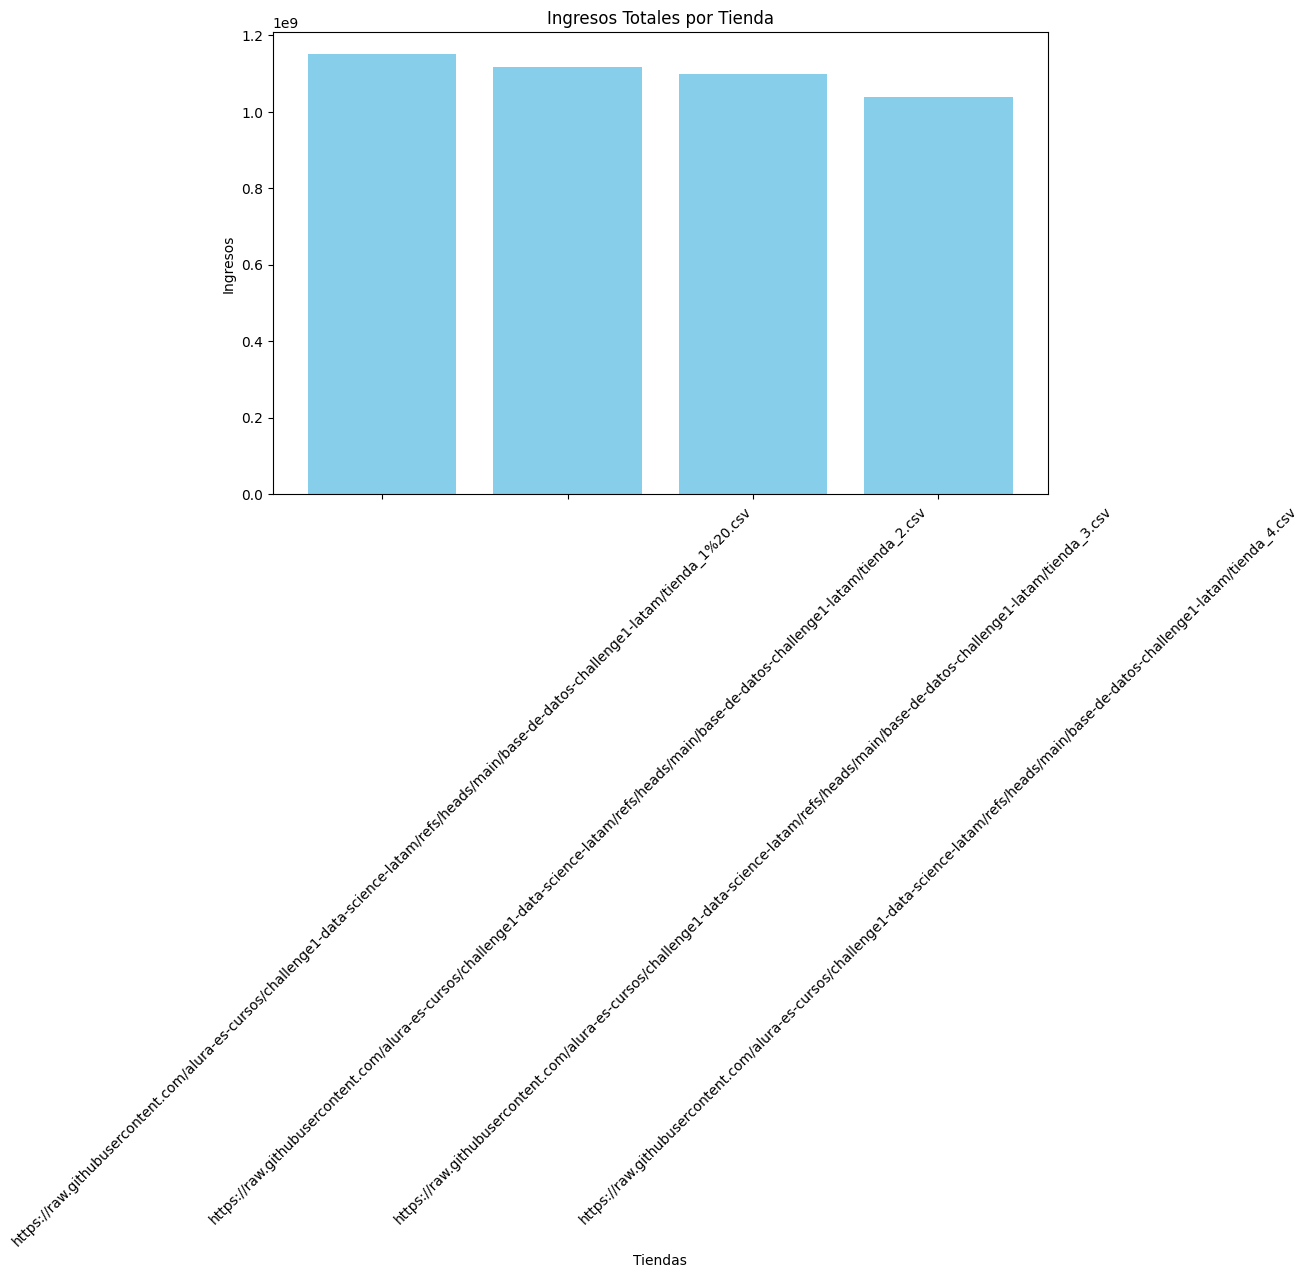

In [69]:
# Visualización de datos
# Gráfico de ingresos totales
nombres = [nombres_tiendas[t] for t in ingresos.keys()]
plt.figure(figsize=(8, 5))
plt.bar(nombres, ingresos.values(), color='skyblue')
plt.title("Ingresos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()
